**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Omar Alonso Hernández Vergara

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


:1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [143]:
happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visualizción de datos con Python/Reto/happiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [126]:
mexico=happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0.5, 1.0, 'World Happines Report')

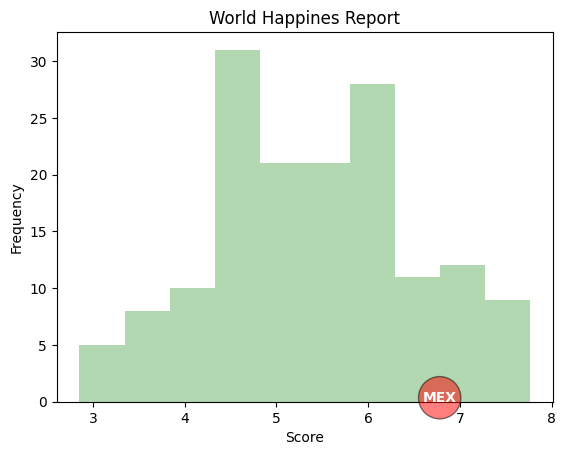

In [127]:
value= mexico['Score'].tolist()[0]
props_bbox={'boxstyle':'circle',
            'facecolor':'red',
            'alpha':0.5,
            }
plt.hist(x='Score', data=happiness, color='green', alpha=.3)

plt.text(value,0,'MEX',color='white',fontweight='bold',bbox=props_bbox)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('World Happines Report')

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.2, 0.861, 'MEX')

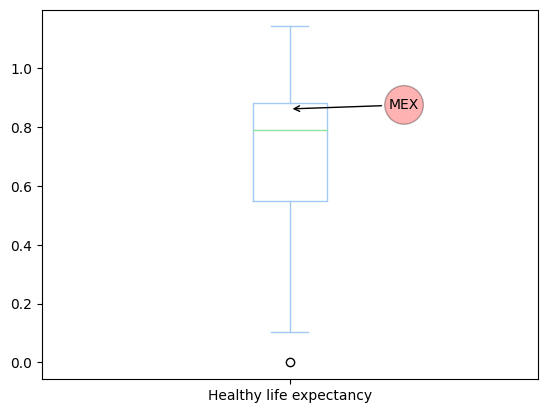

In [128]:
props_bbox={'boxstyle':'circle',
            'facecolor':'red',
            'alpha':0.3,
            }

value=happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0]
happiness['Healthy life expectancy'].plot.box()

plt.annotate('MEX', xy=(1,value), xytext=(1.2,value), arrowprops=dict(arrowstyle='->') , bbox= props_bbox)

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [129]:
mex1= mexico
mex1.drop(['Overall rank','Score'],axis=1, inplace=True)
mex1.reset_index(drop=True, inplace=True)
mex1=mex1.T

<ipython-input-129-64631ebd614b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mex1.drop(['Overall rank','Score'],axis=1, inplace=True)


Text(0.5, 1.0, 'Contribution in Mexico happines score')

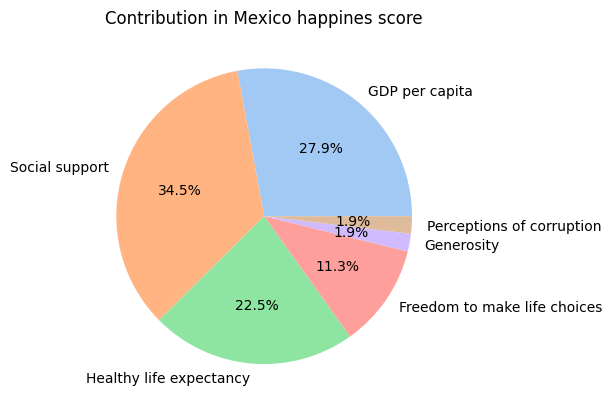

In [133]:
sns.set_palette('pastel')
mex1.rename(columns={0:'Factors'},inplace=True)
plt.pie(x='Factors',labels=mex1.index ,data=mex1, autopct='%1.1f%%')
plt.title('Contribution in Mexico happines score')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [191]:
least = happiness.loc[happiness['Score']== happiness['Score'].min()]
most= happiness.loc[happiness['Score']== happiness['Score'].max() ]
mx =happiness.loc[happiness['Country or region']== 'Mexico'  ]
most_corrupted= happiness.loc[happiness['Perceptions of corruption']== happiness['Perceptions of corruption'].max() ]
most_GDP=happiness.loc[happiness['GDP per capita']== happiness['GDP per capita'].max() ]

score = pd.concat([least, most, mx, most_corrupted, most_GDP])
score.drop(['Overall rank','Score'], axis=1, inplace=True)
score.reset_index(drop=True,inplace=True)
score.set_index('Country or region',inplace=True)
score

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Singapore,1.572,1.463,1.141,0.556,0.271,0.453
Qatar,1.684,1.313,0.871,0.555,0.220,0.167


<Axes: >

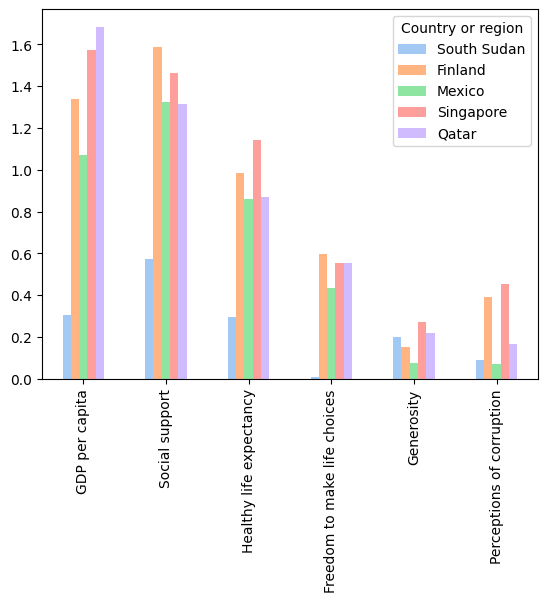

In [196]:
sns.set_palette('pastel')
score.T.plot.bar()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0.5, 1.0, 'Contribution in happiness score')

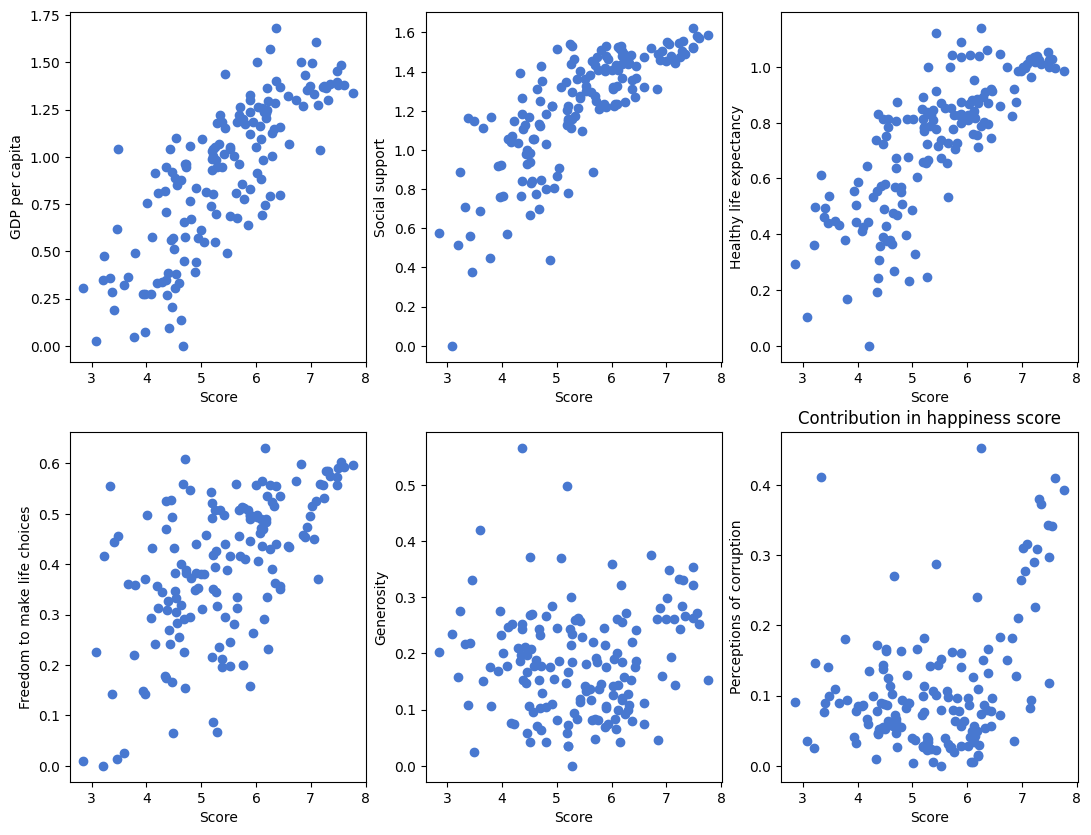

In [236]:
sns.set_palette('muted')

fig= plt.figure(figsize=(13,10))

ax1=fig.add_subplot(231)
ax1.scatter(x=happiness['Score'], y=happiness['GDP per capita'])
ax1.set_ylabel('GDP per capita')
ax1.set_xlabel('Score')

ax2=fig.add_subplot(232)
ax2.scatter(x=happiness['Score'], y=happiness['Social support'])
ax2.set_ylabel('Social support')
ax2.set_xlabel('Score')


ax3=fig.add_subplot(233)
ax3.scatter(x=happiness['Score'], y=happiness['Healthy life expectancy'])
ax3.set_ylabel('Healthy life expectancy')
ax3.set_xlabel('Score')

ax4=fig.add_subplot(234)
ax4.scatter(x=happiness['Score'], y=happiness['Freedom to make life choices'])
ax4.set_ylabel('Freedom to make life choices')
ax4.set_xlabel('Score')

ax5=fig.add_subplot(235)
ax5.scatter(x=happiness['Score'], y=happiness['Generosity'])
ax5.set_ylabel('Generosity')
ax5.set_xlabel('Score')


ax6=fig.add_subplot(236)
ax6.scatter(x=happiness['Score'], y=happiness['Perceptions of corruption'])
ax6.set_ylabel('Perceptions of corruption')
ax6.set_xlabel('Score')


plt.title('Contribution in happiness score')

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-238-15bee62ba3a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(happiness.corr(),2), annot=True)


<Axes: >

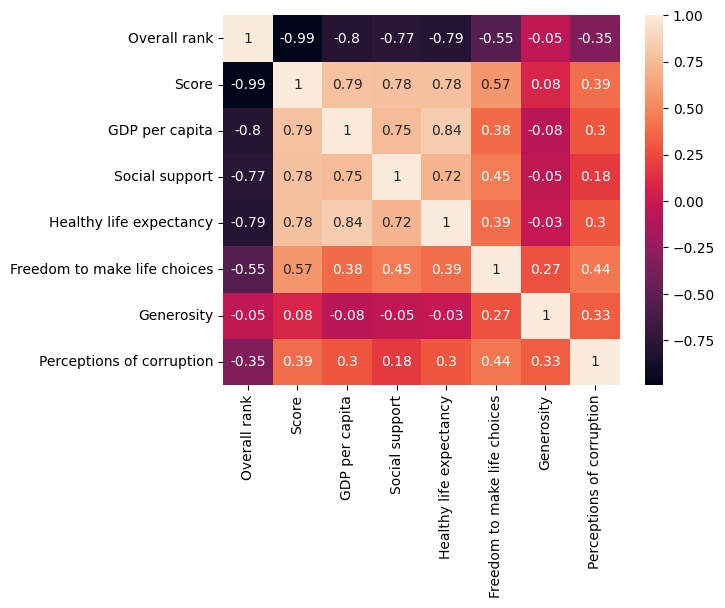

In [238]:
sns.heatmap(round(happiness.corr(),2), annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [240]:
metada = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visualizción de datos con Python/Reto/Metadata.csv')
metada.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [242]:
merged_df= happiness.merge(metada, left_on='Country or region', right_on='TableName')
merged_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands


<ipython-input-261-589625ea3ace>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_mean=merged_df.groupby(['Region']).mean()[['Score']]


Text(0.5, 1.0, 'World Happines Report')

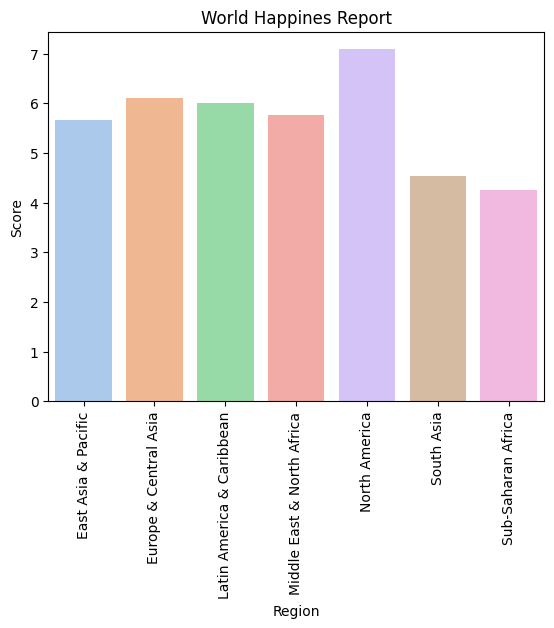

In [261]:
sns.set_palette('pastel')
score_mean=merged_df.groupby(['Region']).mean()[['Score']]

sns.barplot(x=score_mean.index, y='Score',data=score_mean)
plt.xticks(rotation=90)
plt.title('World Happines Report')
